# Coverage analysis

In [3]:
import networkx as nx
import matplotlib
from matplotlib import pyplot
from statistics import median

## Load graph
Parsing GFA file manually, since GfaPy takes a strangely long amount of time reading through it.

In [4]:
# Loads the old graph
#FILENAME = "/home/marcus/PevznerLabBigData/old_graph/sheep_graph_noseq.gfa"

# Loads the new graph
FILENAME = "/home/marcus/PevznerLabBigData/20201014_graph/noseq.gfa"

# We ignore directionality for right now
graph = nx.Graph()

with open(FILENAME, "r") as gfafile:
    for line in gfafile:
        if line[0] == "S":
            parts = line.strip().split("\t")
            node_name = parts[1]
            node_len = None
            node_cov = None
            extra_data = parts[3:]
            for tag in extra_data:
                if tag.startswith("LN:i:"):
                    if node_len is None:
                        node_len = int(tag[5:])
                    else:
                        raise ValueError("Duplicate length for node {}".format(node_name))
                elif tag.startswith("dp:i:"):
                    if node_cov is None:
                        node_cov = int(tag[5:])
                    else:
                        raise ValueError("Duplicate coverage for node {}".format(node_name))
            graph.add_node(node_name, length=node_len, cov=node_cov)
        elif line[0] == "L":
            parts = line.strip().split("\t")
            src = parts[1]
            snk = parts[3]
            # Ignore directionality for just right now; this means that some links will be "repeated" (for
            # the new graph this means that the NX representation has 484 less links)
            graph.add_edge(src, snk)

print("Graph contains {} edges (represented as GFA segments).".format(graph.number_of_nodes()))
print("Graph contains {} links between edges (ignoring directionality for now).".format(graph.number_of_edges()))
print("Graph contains {} connected components.".format(nx.number_connected_components(graph)))

Graph contains 36260 edges (represented as GFA segments).
Graph contains 40545 links between edges (ignoring directionality for now).
Graph contains 8655 connected components.


## Compute coverage statstics for each component

In [5]:
# Sort components by number of edges.
node2len = nx.get_node_attributes(graph, "length")
node2cov = nx.get_node_attributes(graph, "cov")
sorted_components = sorted(
    nx.connected_components(graph),
    key=len,
    reverse=True
)

node2cmp = {}
cmp2totalLen = {}
cmp2meanCov = {}
cmp2medianCov = {}
cmp2cov = {}
for i, cmp in enumerate(sorted_components):
    for node in cmp:
        node2cmp[node] = i + 1
    cmp2cov[i] = [node2cov[node] for node in cmp]
    cmp2totalLen[i] = sum([node2len[node] for node in cmp])
    cmp2meanCov[i] = sum(cmp2cov[i]) / len(cmp)
    cmp2medianCov[i] = median(cmp2cov[i])
    # https://stackoverflow.com/a/10742904/10730311
    cmpNum = "{:,}".format(i + 1).ljust(6, " ")
    print("Component #{}: {} edges, total length {:,}, mean coverage {:.2f}x, median coverage {:.2f}x, has edge {}".format(
        # https://stackoverflow.com/a/59841/10730311
        cmpNum, len(cmp), cmp2totalLen[i], cmp2meanCov[i], cmp2medianCov[i], next(iter(cmp))
    ))

Component #1     : 21062 edges, total length 671,531,395, mean coverage 197.31x, median coverage 19.00x, has edge 15815
Component #2     : 823 edges, total length 7,117,879, mean coverage 23.15x, median coverage 19.00x, has edge 22760
Component #3     : 422 edges, total length 6,960,522, mean coverage 12.80x, median coverage 11.00x, has edge 11207
Component #4     : 383 edges, total length 5,802,376, mean coverage 46.33x, median coverage 40.00x, has edge 17873
Component #5     : 304 edges, total length 2,657,523, mean coverage 300.43x, median coverage 272.50x, has edge 851
Component #6     : 295 edges, total length 2,434,666, mean coverage 17.67x, median coverage 17.00x, has edge 12222
Component #7     : 205 edges, total length 1,761,875, mean coverage 35.33x, median coverage 32.00x, has edge 18646
Component #8     : 152 edges, total length 14,109,441, mean coverage 24.25x, median coverage 16.00x, has edge 21060
Component #9     : 143 edges, total length 3,705,162, mean coverage 8.86x,

Component #1,558 : 1 edges, total length 3,266, mean coverage 10.00x, median coverage 10.00x, has edge 6338
Component #1,559 : 1 edges, total length 599, mean coverage 470.00x, median coverage 470.00x, has edge 6344
Component #1,560 : 1 edges, total length 600, mean coverage 287.00x, median coverage 287.00x, has edge 6345
Component #1,561 : 1 edges, total length 78,728, mean coverage 3.00x, median coverage 3.00x, has edge 6346
Component #1,562 : 1 edges, total length 51,199, mean coverage 3.00x, median coverage 3.00x, has edge 6347
Component #1,563 : 1 edges, total length 29,290, mean coverage 3.00x, median coverage 3.00x, has edge 6356
Component #1,564 : 1 edges, total length 39,531, mean coverage 4.00x, median coverage 4.00x, has edge 6359
Component #1,565 : 1 edges, total length 10,606, mean coverage 32.00x, median coverage 32.00x, has edge 6369
Component #1,566 : 1 edges, total length 1,738, mean coverage 35.00x, median coverage 35.00x, has edge 6372
Component #1,567 : 1 edges, tot

Component #4,454 : 1 edges, total length 7,623, mean coverage 5.00x, median coverage 5.00x, has edge 20056
Component #4,455 : 1 edges, total length 15,906, mean coverage 4.00x, median coverage 4.00x, has edge 20057
Component #4,456 : 1 edges, total length 12,507, mean coverage 3.00x, median coverage 3.00x, has edge 20064
Component #4,457 : 1 edges, total length 7,073, mean coverage 4.00x, median coverage 4.00x, has edge 20072
Component #4,458 : 1 edges, total length 61,409, mean coverage 6.00x, median coverage 6.00x, has edge 20077
Component #4,459 : 1 edges, total length 3,769, mean coverage 4.00x, median coverage 4.00x, has edge 20082
Component #4,460 : 1 edges, total length 1,882, mean coverage 6.00x, median coverage 6.00x, has edge 20089
Component #4,461 : 1 edges, total length 122,329, mean coverage 5.00x, median coverage 5.00x, has edge 20102
Component #4,462 : 1 edges, total length 1,386, mean coverage 3.00x, median coverage 3.00x, has edge 20109
Component #4,463 : 1 edges, tota

Component #7,677 : 1 edges, total length 62,170, mean coverage 3.00x, median coverage 3.00x, has edge 30878
Component #7,678 : 1 edges, total length 16,840, mean coverage 7.00x, median coverage 7.00x, has edge 30879
Component #7,679 : 1 edges, total length 40,829, mean coverage 12.00x, median coverage 12.00x, has edge 30880
Component #7,680 : 1 edges, total length 75,205, mean coverage 4.00x, median coverage 4.00x, has edge 30883
Component #7,681 : 1 edges, total length 135,575, mean coverage 3.00x, median coverage 3.00x, has edge 30886
Component #7,682 : 1 edges, total length 23,043, mean coverage 4.00x, median coverage 4.00x, has edge 30888
Component #7,683 : 1 edges, total length 75,941, mean coverage 4.00x, median coverage 4.00x, has edge 30889
Component #7,684 : 1 edges, total length 56,662, mean coverage 3.00x, median coverage 3.00x, has edge 30890
Component #7,685 : 1 edges, total length 39,393, mean coverage 4.00x, median coverage 4.00x, has edge 30891
Component #7,686 : 1 edge

## Compute entire-graph coverage statistics

In [6]:
covs = node2cov.values()
print("Minimum coverage: {}".format(min(covs)))
print("Maximum coverage: {}\n".format(max(covs)))
print("Average coverage: {:.2f}".format(sum(covs) / len(covs)))
print("Median coverage: {}\n".format(median(covs)))

print("===MAX COVERAGE EDGES===")
max_cov_nodes = sorted(node2cov.keys(), key=lambda node: node2cov[node], reverse=True)
for i in range(10):
    node = max_cov_nodes[i]
    print(
        "{}. Edge {} has a coverage of {}. {} neighbors.".format(
            i + 1, node, node2cov[node], len(graph.adj[node])
        )
    )
    
# (Allowing self edges, tho)
print("\n===MAX COVERAGE EDGES (just isolated ones)===")
max_cov_isolated_nodes = list(
    filter(
        lambda node: len(set(graph.adj[node]) - set([node])) == 0,
        max_cov_nodes
    )
)
for i in range(10):
    node = max_cov_isolated_nodes[i]
    print("{}. Edge {} has a coverage of {}.".format(i + 1, node, node2cov[node]))

Minimum coverage: 0
Maximum coverage: 220608

Average coverage: 139.06
Median coverage: 12.0

===MAX COVERAGE EDGES===
1. Edge 3782 has a coverage of 220608. 5 neighbors.
2. Edge 3788 has a coverage of 200830. 7 neighbors.
3. Edge 1016 has a coverage of 184382. 3 neighbors.
4. Edge 3784 has a coverage of 174847. 4 neighbors.
5. Edge 1012 has a coverage of 139715. 7 neighbors.
6. Edge 3791 has a coverage of 105920. 4 neighbors.
7. Edge 1019 has a coverage of 81073. 3 neighbors.
8. Edge 2 has a coverage of 70236. 5 neighbors.
9. Edge 999 has a coverage of 69045. 7 neighbors.
10. Edge 1014 has a coverage of 51202. 4 neighbors.

===MAX COVERAGE EDGES (just isolated ones)===
1. Edge 1010 has a coverage of 25421.
2. Edge 3172 has a coverage of 17083.
3. Edge 12782 has a coverage of 9204.
4. Edge 836 has a coverage of 8864.
5. Edge 842 has a coverage of 8831.
6. Edge 31439 has a coverage of 8761.
7. Edge 3175 has a coverage of 8660.
8. Edge 831 has a coverage of 8646.
9. Edge 833 has a covera

## Find long (>= 1 million bp) and high-coverage (> 500x) edges in simple areas of the graph

(Good candidates for constructing mutation spectra.)

In [5]:
good_nodes = filter(lambda node: node2len[node] > 1000000, max_cov_nodes)
for i, node in enumerate(good_nodes):
    if node2cov[node] >= 100:
        cmp = node2cmp[node]
        neighbors = set(graph.adj[node]) - set([node])
        print(
            "{}. Edge {} has a coverage of {:,} and length of {:,}. {} neighbors, ignoring self-edges. In component {}.".format(
                i + 1, node, node2cov[node], node2len[node], len(neighbors), cmp
            )
        )
    else:
        break

1. Edge 1483 has a coverage of 1,221 and length of 1,013,247. 3 neighbors, ignoring self-edges. In component 1.
2. Edge 7998 has a coverage of 853 and length of 1,634,900. 0 neighbors, ignoring self-edges. In component 1822.
3. Edge 166 has a coverage of 557 and length of 1,302,342. 0 neighbors, ignoring self-edges. In component 512.
4. Edge 6018 has a coverage of 538 and length of 2,232,606. 3 neighbors, ignoring self-edges. In component 150.
5. Edge 4706 has a coverage of 434 and length of 1,020,246. 4 neighbors, ignoring self-edges. In component 1.
6. Edge 3233 has a coverage of 430 and length of 1,036,175. 3 neighbors, ignoring self-edges. In component 1.
7. Edge 2069 has a coverage of 248 and length of 2,778,833. 0 neighbors, ignoring self-edges. In component 843.
8. Edge 1866 has a coverage of 245 and length of 1,523,208. 3 neighbors, ignoring self-edges. In component 1.
9. Edge 25824 has a coverage of 196 and length of 1,197,225. 3 neighbors, ignoring self-edges. In component 1.

## Visualize histogram of average coverage by component

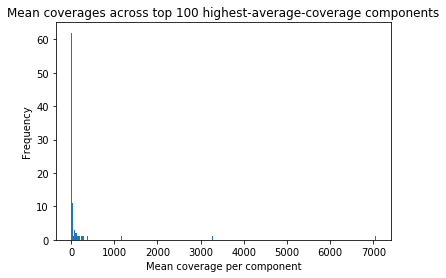

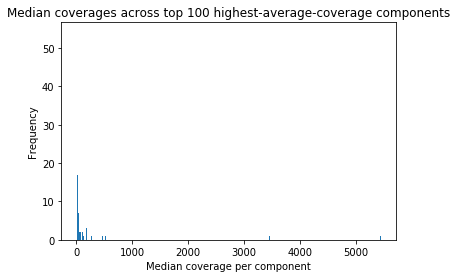

In [6]:
%matplotlib inline

pyplot.hist(x=[cmp2meanCov[c] for c in range(100)], bins="auto")
pyplot.xlabel("Mean coverage per component")
pyplot.ylabel("Frequency")
pyplot.title("Mean coverages across top 100 highest-average-coverage components")
pyplot.show()

pyplot.hist(x=[cmp2medianCov[c] for c in range(100)], bins="auto")
pyplot.xlabel("Median coverage per component")
pyplot.ylabel("Frequency")
pyplot.title("Median coverages across top 100 highest-average-coverage components")
pyplot.show()

## Visualize coverage histograms for the top $N$ components by mean coverage
Adapted from [this article](https://realpython.com/python-histograms/#visualizing-histograms-with-matplotlib-and-pandas).

In [6]:
%matplotlib inline
import math

N = 72

for i in range(N):
    noun = "edge" if len(cmp2cov[i]) == 1 else "edges"
    title = "Coverages: Component #{}\n{:,} {}; total length {:,}; mean coverage {:.2f}x".format(
        i + 1, len(cmp2cov[i]), noun, cmp2totalLen[i], cmp2meanCov[i]
    )
    pyplot.hist(x=cmp2cov[i], bins="auto")
        
    pyplot.xlabel("Coverage")
    pyplot.ylabel("Frequency")
    pyplot.title(title)
    pyplot.show()

KeyboardInterrupt: 

## How many of the top $N$ components contain just 1 edge?

In [7]:
num_1_edge_cmps = 0
for i in range(N):
    if len(cmp2cov[i]) == 1:
        num_1_edge_cmps += 1
print("{} of the top {} components have just 1 edge.".format(num_1_edge_cmps, N))

NameError: name 'N' is not defined

## For all components, plot number of edges vs. mean coverage

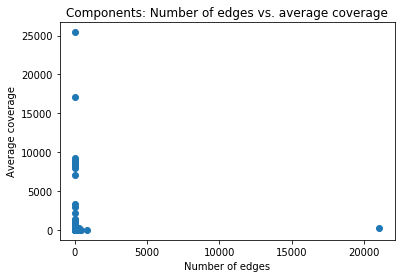

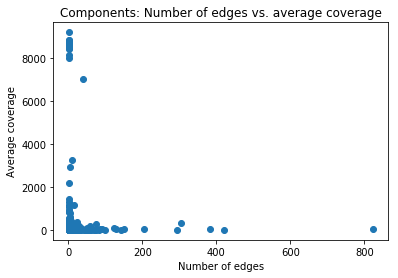

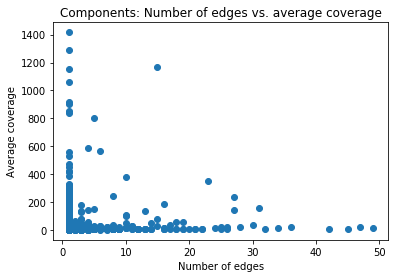

In [8]:
for cutoffs in [ [float("inf"), float("inf")], [1000, 10000], [50, 2000] ]:
    num_edges = []
    mean_cov = []
    for i, cmp in enumerate(sorted_components):
        ne = len(cmp)
        mc = cmp2meanCov[i]
        if ne < cutoffs[0] and mc < cutoffs[1]:
            num_edges.append(ne)
            mean_cov.append(mc)

    pyplot.scatter(x=num_edges, y=mean_cov)
    pyplot.title("Components: Number of edges vs. average coverage")
    pyplot.xlabel("Number of edges")
    pyplot.ylabel("Average coverage")
    pyplot.show()

## Prove that for every edge E in the graph, E and -E are not in the same weakly connected component

In [23]:
FILENAME = "/home/marcus/PevznerLabBigData/20201014_graph/noseq.gfa"

# We ignore directionality for right now
graph = nx.DiGraph()

def invert_orient(orient):
    if orient == "+":
        return "-"
    elif orient == "-":
        return "+"
    else:
        raise ValueError("Invalid orienatation {}".format(orient))

# !!! Load graph in "double" mode, i.e. treating each edge's + and - as two objects. !!!
        
with open(FILENAME, "r") as gfafile:
    for line in gfafile:
        if line[0] == "S":
            parts = line.strip().split("\t")
            node_name = parts[1]
            node_len = None
            node_cov = None
            extra_data = parts[3:]
            for tag in extra_data:
                if tag.startswith("LN:i:"):
                    if node_len is None:
                        node_len = int(tag[5:])
                    else:
                        raise ValueError("Duplicate length for node {}".format(node_name))
                elif tag.startswith("dp:i:"):
                    if node_cov is None:
                        node_cov = int(tag[5:])
                    else:
                        raise ValueError("Duplicate coverage for node {}".format(node_name))
            graph.add_node(node_name + "+", length=node_len, cov=node_cov)
            graph.add_node(node_name + "-", length=node_len, cov=node_cov)
        elif line[0] == "L":
            parts = line.strip().split("\t")
            src = parts[1]
            src_orient = parts[2]
            snk = parts[3]
            snk_orient = parts[2]
            
            graph.add_edge(src + src_orient, snk + snk_orient)
            graph.add_edge(snk + invert_orient(snk_orient), src + invert_orient(src_orient))

In [24]:
sorted_components = sorted(
    nx.weakly_connected_components(graph),
    key=len,
    reverse=True
)
for cmp in sorted_components:
    for node in cmp:
        rc = node[:-1] + invert_orient(node[-1])
        if rc in cmp:
            print(node, rc, "in same weakly connected component!")